<a href="https://colab.research.google.com/github/sruthipsuresh/best-sellers-analysis/blob/main/wordcloudandtextblob.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0


In [13]:
import pandas as pd
import re
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import seaborn as sns
! pip install -U textblob
from textblob import TextBlob
from google.colab import files
import matplotlib.pyplot as plt
% matplotlib inline


Requirement already up-to-date: textblob in /usr/local/lib/python3.7/dist-packages (0.15.3)


In [11]:
# Load 
nyt = pd.read_csv("/content/nytcleaned.csv") #loading data
nyt.head()

,Unnamed: 0,results__books__description,results__books__title,results__books__author,results__books__amazon_product_url
0,0,An approach to dealing with trauma that shifts...,WHAT HAPPENED TO YOU?,Bruce D. Perry and Oprah Winfrey,https://www.amazon.com/dp/1250223180?tag=NYTBS...
1,6,A look at the key players and outcomes of prec...,THE BOMBER MAFIA,Malcolm Gladwell,https://www.amazon.com/dp/0316296619?tag=NYTBS...
2,12,An anthology of writing on the Black experienc...,YOU ARE YOUR BEST THING,edited Tarana Burke and Brené Brown,https://www.amazon.com/dp/0593243625?tag=NYTBS...
3,18,A collection of essays by the Emmy-winning act...,HOW Y'ALL DOING?,Leslie Jordan,https://www.amazon.com/dp/0063076195?tag=NYTBS...
4,24,"How trauma affects the body and mind, and inno...",THE BODY KEEPS THE SCORE,Bessel van der Kolk,http://www.amazon.com/The-Body-Keeps-Score-Hea...


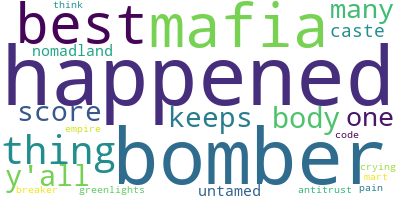

In [22]:
# FIRST LOOKING AT TITLES
# Remove punctuation
nyt['results__books__title'] = nyt['results__books__title'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
nyt['results__books__title'] = nyt['results__books__title'].map(lambda x: x.lower())
# Print out the first rows of papers
nyt['results__books__title'].head()
long_string = ','.join(list(nyt['results__books__title'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()


In [16]:
# Run test case
textblob = pd.DataFrame(nyt)
titletest = nyt.results__books__title[2]
str(titletest)
analysis = TextBlob(titletest)
print("The test case is '" + titletest + "' and the sentiment calculation is" + str(analysis.sentiment))

The test case is 'you are your best thing' and the sentiment calculation isSentiment(polarity=1.0, subjectivity=0.3)


In [17]:
textblob['results__books__title'] = textblob['results__books__title'].astype(str)
polarity = lambda x: TextBlob(x).sentiment.polarity
subjectivity = lambda x: TextBlob(x).sentiment.subjectivity
textblob['polarity'] = textblob['results__books__title'].apply(polarity)
textblob['subjectivity'] = textblob['results__books__title'].apply(subjectivity)
textblob.head()


,Unnamed: 0,results__books__description,results__books__title,results__books__author,results__books__amazon_product_url,polarity,subjectivity
0,0,An approach to dealing with trauma that shifts...,what happened to you,Bruce D. Perry and Oprah Winfrey,https://www.amazon.com/dp/1250223180?tag=NYTBS...,0.0,0.0
1,6,A look at the key players and outcomes of prec...,the bomber mafia,Malcolm Gladwell,https://www.amazon.com/dp/0316296619?tag=NYTBS...,0.0,0.0
2,12,An anthology of writing on the Black experienc...,you are your best thing,edited Tarana Burke and Brené Brown,https://www.amazon.com/dp/0593243625?tag=NYTBS...,1.0,0.3
3,18,A collection of essays by the Emmy-winning act...,how y'all doing,Leslie Jordan,https://www.amazon.com/dp/0063076195?tag=NYTBS...,0.0,0.0
4,24,"How trauma affects the body and mind, and inno...",the body keeps the score,Bessel van der Kolk,http://www.amazon.com/The-Body-Keeps-Score-Hea...,0.0,0.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

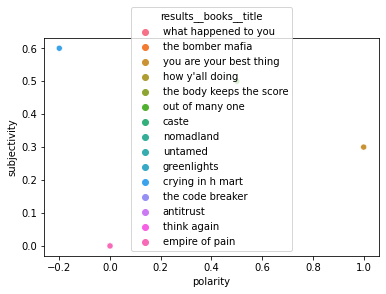

In [20]:
sns.scatterplot(data=textblob, x="polarity", y="subjectivity", hue = "results__books__title")
plt.savefig('titlepolsub.png')
files.download('titlepolsub.png')


In [27]:
## NOW LET'S LOOK AT DESCRIPTIONS

# Load 
nyt = pd.read_csv("/content/nytcleaned.csv") #loading data
nyt.head()

,Unnamed: 0,results__books__description,results__books__title,results__books__author,results__books__amazon_product_url
0,0,An approach to dealing with trauma that shifts...,WHAT HAPPENED TO YOU?,Bruce D. Perry and Oprah Winfrey,https://www.amazon.com/dp/1250223180?tag=NYTBS...
1,6,A look at the key players and outcomes of prec...,THE BOMBER MAFIA,Malcolm Gladwell,https://www.amazon.com/dp/0316296619?tag=NYTBS...
2,12,An anthology of writing on the Black experienc...,YOU ARE YOUR BEST THING,edited Tarana Burke and Brené Brown,https://www.amazon.com/dp/0593243625?tag=NYTBS...
3,18,A collection of essays by the Emmy-winning act...,HOW Y'ALL DOING?,Leslie Jordan,https://www.amazon.com/dp/0063076195?tag=NYTBS...
4,24,"How trauma affects the body and mind, and inno...",THE BODY KEEPS THE SCORE,Bessel van der Kolk,http://www.amazon.com/The-Body-Keeps-Score-Hea...


In [31]:
# FIRST LOOKING AT TITLES
# Remove punctuation
nyt['results__books__description'] = nyt['results__books__description'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
nyt['results__books__description'] = nyt['results__books__description'].map(lambda x: x.lower())
# Print out the first rows of papers
nyt['results__books__description'].head()
long_string = ','.join(list(nyt['results__books__description'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()
wordcloud.to_file('descriptionwordcloud.png')
